This is a simple example on how you can use a jupyter notebook to train your model :) 

In [4]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots

In [5]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        num_filters = 32  # Set number of filters in first conv layer
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(
                in_channels=image_channels,
                out_channels=num_filters,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU()
        )
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        self.num_output_features = 32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            nn.Linear(self.num_output_features, num_classes),
        )

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        batch_size = x.shape[0]
        out = self.feature_extractor(x)
        out = out.view(batch_size, -1)
        out = self.classifier(out)        
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [9]:
epochs = 5
batch_size = 64
learning_rate = 1e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
ExampleModel(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=32768, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 57.87, Global step:    351, Validation Loss: 0.00, Validation Accuracy: 0.000
Epoch: 0, Batches per seconds: 63.11, Global step:    702, Validation Loss: 0.00, Validation Accuracy: 0.000
Epoch: 1, Batches per seconds: 63.43, Global step:   1053, Validation Loss: 0.00, Validation Accuracy: 0.000
Epoch: 1, Batches per seconds: 64.15, Global step:   1404, Validation Loss: 0.00, Validation Accuracy: 0.000
Early stop criteria met
Early stopping.


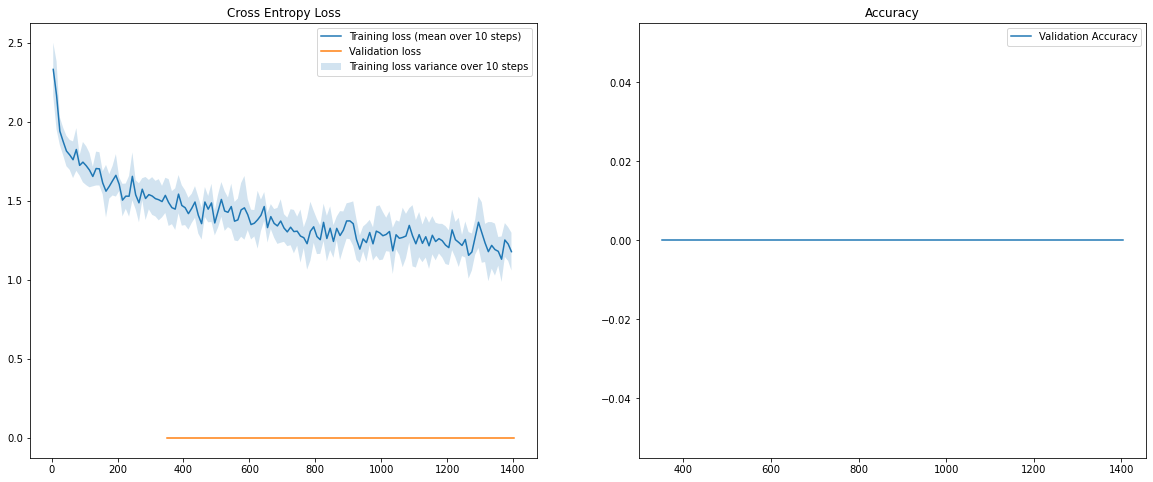

In [7]:
create_plots(trainer, "task2")